Data Preprocessing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scalecast.Forecaster import Forecaster
%matplotlib inline

auckland_soil = pd.read_csv('../Data/combineSoildata.csv', index_col=['Timestamp (UTC+12:00)'], parse_dates=['Timestamp (UTC+12:00)'])
auckland_soil.head()


,Rain_MtAlbert(mm),SoilTemp_MtAlbert(c),SoilMoisture_MtAlbert(%),Rain_Ararimu(mm),SoilTemp_Ararimu(c),SoilMoisture_Ararimu(%),Rain_awhitu(mm),SoilTemp_awhitu(c),SoilMoisture_awhitu(%),Rain_kaipara(mm),...,SoilMoisture_kaipara(%),Rain_tomarata(mm),SoilTemp_tomarata(c),SoilMoisture_tomarata(%),Rain_Waitangi(mm),SoilTemp_Waitangi(c),SoilMoisture_Waitangi(%),Rain_Whangamarie(mm),SoilTemp_Whangamarie(c),SoilMoisture_Whangamarie(%)
Timestamp (UTC+12:00),,,,,,,,,,,,,,,,,,,,,
2019-12-10 22:30:00,0.0,22.00,37.9775,0.0,19.20,36.790,0.0,24.20,38.945333,0.0,...,29.0160,0.0,20.40,28.1220,0.0,21.65,40.1145,0.0,23.00,38.027333
2019-12-10 23:00:00,0.0,21.95,37.9970,0.0,19.10,36.840,0.0,24.00,40.828000,0.0,...,28.9685,0.0,20.35,28.2135,0.0,21.50,40.1340,0.0,22.95,40.257000
2019-12-10 23:30:00,0.0,21.80,37.9790,0.0,18.90,36.840,0.0,23.85,40.800000,0.0,...,28.9720,0.0,20.20,28.1235,0.0,21.30,40.1345,0.0,22.75,40.223000
2019-12-11 00:00:00,0.0,21.80,37.9970,0.0,18.80,36.838,0.0,23.65,40.803000,0.0,...,28.9705,0.0,20.15,28.3090,0.0,21.15,40.0620,0.0,22.50,40.257500
2019-12-11 00:30:00,0.0,21.65,37.9995,0.0,18.75,36.838,0.0,23.45,40.803000,0.0,...,28.9465,0.0,20.00,28.3090,0.0,20.95,40.1360,0.0,22.50,40.239500


In [4]:
auckland_soil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77436 entries, 2019-12-10 22:30:00 to 2024-09-09 21:30:00
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rain_MtAlbert(mm)            77436 non-null  float64
 1   SoilTemp_MtAlbert(c)         77436 non-null  float64
 2   SoilMoisture_MtAlbert(%)     77436 non-null  float64
 3   Rain_Ararimu(mm)             77436 non-null  float64
 4   SoilTemp_Ararimu(c)          77436 non-null  float64
 5   SoilMoisture_Ararimu(%)      77436 non-null  float64
 6   Rain_awhitu(mm)              77436 non-null  float64
 7   SoilTemp_awhitu(c)           77436 non-null  float64
 8   SoilMoisture_awhitu(%)       77436 non-null  float64
 9   Rain_kaipara(mm)             77436 non-null  float64
 10  SoilTemp_kaipara(c)          77436 non-null  float64
 11  SoilMoisture_kaipara(%)      77436 non-null  float64
 12  Rain_tomarata(mm)            77436 non-

In [5]:
print(auckland_soil.isnull().sum())


Rain_MtAlbert(mm)              0
SoilTemp_MtAlbert(c)           0
SoilMoisture_MtAlbert(%)       0
Rain_Ararimu(mm)               0
SoilTemp_Ararimu(c)            0
SoilMoisture_Ararimu(%)        0
Rain_awhitu(mm)                0
SoilTemp_awhitu(c)             0
SoilMoisture_awhitu(%)         0
Rain_kaipara(mm)               0
SoilTemp_kaipara(c)            0
SoilMoisture_kaipara(%)        0
Rain_tomarata(mm)              0
SoilTemp_tomarata(c)           0
SoilMoisture_tomarata(%)       0
Rain_Waitangi(mm)              0
SoilTemp_Waitangi(c)           0
SoilMoisture_Waitangi(%)       0
Rain_Whangamarie(mm)           0
SoilTemp_Whangamarie(c)        0
SoilMoisture_Whangamarie(%)    0
dtype: int64


<Axes: xlabel='Timestamp (UTC+12:00)'>

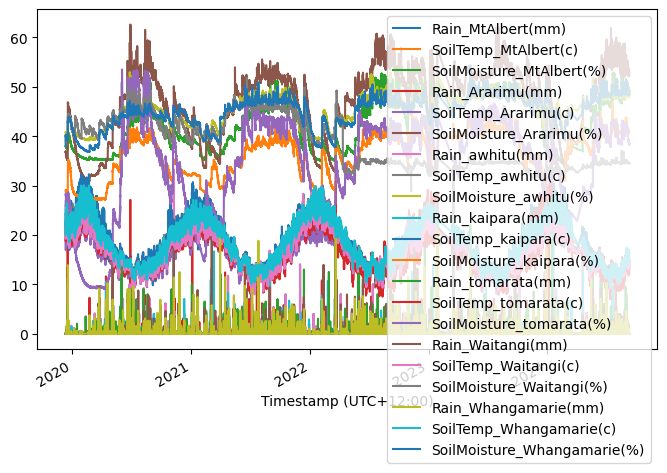

In [6]:
auckland_soil.plot(figsize=(8, 5))

In [7]:
auckland_soil.describe()

,Rain_MtAlbert(mm),SoilTemp_MtAlbert(c),SoilMoisture_MtAlbert(%),Rain_Ararimu(mm),SoilTemp_Ararimu(c),SoilMoisture_Ararimu(%),Rain_awhitu(mm),SoilTemp_awhitu(c),SoilMoisture_awhitu(%),Rain_kaipara(mm),...,SoilMoisture_kaipara(%),Rain_tomarata(mm),SoilTemp_tomarata(c),SoilMoisture_tomarata(%),Rain_Waitangi(mm),SoilTemp_Waitangi(c),SoilMoisture_Waitangi(%),Rain_Whangamarie(mm),SoilTemp_Whangamarie(c),SoilMoisture_Whangamarie(%)
count,77436.000000,77436.000000,77436.000000,77436.000000,77436.000000,77436.000000,77436.000000,77436.000000,77436.000000,77436.000000,...,77436.000000,77436.000000,77436.000000,77436.000000,77436.000000,77436.000000,77436.000000,77436.000000,77436.000000,77436.000000
mean,0.073344,17.374153,42.874949,0.084868,16.228813,47.067378,0.073631,17.669668,45.269887,0.060775,...,36.108684,0.082585,16.674591,34.216904,0.071640,17.050824,38.810822,0.071379,18.502616,44.944133
std,0.453654,3.682494,5.259416,0.541105,3.498581,6.975151,0.467593,4.382007,2.902391,0.421933,...,4.277884,0.501665,4.015546,10.030647,0.475178,3.896410,5.033026,0.454104,4.478718,3.130672
min,0.000000,9.400000,34.324000,0.000000,7.000000,30.951000,0.000000,8.000000,38.945333,0.000000,...,26.181667,0.000000,7.000000,9.020000,0.000000,7.950000,5.621667,0.000000,9.400000,36.836000
25%,0.000000,14.100000,37.775000,0.000000,13.300000,42.352000,0.000000,13.900000,43.021000,0.000000,...,32.930500,0.000000,13.350000,28.212000,0.000000,13.700000,34.426000,0.000000,14.500000,43.088875
50%,0.000000,17.250000,43.433250,0.000000,16.000000,48.966000,0.000000,17.200000,46.312750,0.000000,...,37.222000,0.000000,16.200000,37.074000,0.000000,16.850000,38.823500,0.000000,18.300000,45.728000
75%,0.000000,20.700000,47.234000,0.000000,19.350000,52.384000,0.000000,21.300000,47.586500,0.000000,...,39.638625,0.000000,19.750000,42.115000,0.000000,20.200000,43.452000,0.000000,22.300000,47.207500
max,25.500000,25.350000,53.249000,30.910000,24.700000,62.610500,33.290000,30.250000,52.970000,23.700000,...,46.901500,22.000000,31.700000,53.506000,22.240000,29.600000,51.799500,21.500000,30.050000,54.383000


In [8]:
auckland_soil.head(5)

,Rain_MtAlbert(mm),SoilTemp_MtAlbert(c),SoilMoisture_MtAlbert(%),Rain_Ararimu(mm),SoilTemp_Ararimu(c),SoilMoisture_Ararimu(%),Rain_awhitu(mm),SoilTemp_awhitu(c),SoilMoisture_awhitu(%),Rain_kaipara(mm),...,SoilMoisture_kaipara(%),Rain_tomarata(mm),SoilTemp_tomarata(c),SoilMoisture_tomarata(%),Rain_Waitangi(mm),SoilTemp_Waitangi(c),SoilMoisture_Waitangi(%),Rain_Whangamarie(mm),SoilTemp_Whangamarie(c),SoilMoisture_Whangamarie(%)
Timestamp (UTC+12:00),,,,,,,,,,,,,,,,,,,,,
2019-12-10 22:30:00,0.0,22.00,37.9775,0.0,19.20,36.790,0.0,24.20,38.945333,0.0,...,29.0160,0.0,20.40,28.1220,0.0,21.65,40.1145,0.0,23.00,38.027333
2019-12-10 23:00:00,0.0,21.95,37.9970,0.0,19.10,36.840,0.0,24.00,40.828000,0.0,...,28.9685,0.0,20.35,28.2135,0.0,21.50,40.1340,0.0,22.95,40.257000
2019-12-10 23:30:00,0.0,21.80,37.9790,0.0,18.90,36.840,0.0,23.85,40.800000,0.0,...,28.9720,0.0,20.20,28.1235,0.0,21.30,40.1345,0.0,22.75,40.223000
2019-12-11 00:00:00,0.0,21.80,37.9970,0.0,18.80,36.838,0.0,23.65,40.803000,0.0,...,28.9705,0.0,20.15,28.3090,0.0,21.15,40.0620,0.0,22.50,40.257500
2019-12-11 00:30:00,0.0,21.65,37.9995,0.0,18.75,36.838,0.0,23.45,40.803000,0.0,...,28.9465,0.0,20.00,28.3090,0.0,20.95,40.1360,0.0,22.50,40.239500


Lag Features

In [9]:
rain_lag_size = [7, 14, 30, 60] 

rainfall_columns = [
    'Rain_MtAlbert(mm)', 'Rain_Ararimu(mm)', 'Rain_awhitu(mm)', 'Rain_kaipara(mm)', 
    'Rain_tomarata(mm)', 'Rain_Waitangi(mm)', 'Rain_Whangamarie(mm)'
]

# Create lag features for 'Rainfall (mm)'
for rain_col in rainfall_columns:
    for lag in rain_lag_size:
        auckland_soil[f'{rain_col}_lag_{lag}'] = auckland_soil[rain_col].shift(lag)


auckland_soil.dropna(inplace=True)
auckland_soil.head()


,Rain_MtAlbert(mm),SoilTemp_MtAlbert(c),SoilMoisture_MtAlbert(%),Rain_Ararimu(mm),SoilTemp_Ararimu(c),SoilMoisture_Ararimu(%),Rain_awhitu(mm),SoilTemp_awhitu(c),SoilMoisture_awhitu(%),Rain_kaipara(mm),...,Rain_tomarata(mm)_lag_30,Rain_tomarata(mm)_lag_60,Rain_Waitangi(mm)_lag_7,Rain_Waitangi(mm)_lag_14,Rain_Waitangi(mm)_lag_30,Rain_Waitangi(mm)_lag_60,Rain_Whangamarie(mm)_lag_7,Rain_Whangamarie(mm)_lag_14,Rain_Whangamarie(mm)_lag_30,Rain_Whangamarie(mm)_lag_60
Timestamp (UTC+12:00),,,,,,,,,,,,,,,,,,,,,
2019-12-12 04:30:00,0.0,21.15,37.817,0.0,18.0,36.4525,0.0,22.40,40.6190,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-12 05:00:00,0.0,21.10,37.853,0.0,17.9,36.4275,0.0,22.30,40.5930,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-12 05:30:00,0.0,21.10,37.853,0.0,17.7,36.4260,0.0,22.15,40.6065,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-12 06:00:00,0.0,21.05,37.851,0.0,17.6,36.4010,0.0,22.05,40.5955,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-12 06:30:00,0.0,21.00,37.847,0.0,17.6,36.4300,0.0,21.95,40.5985,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Split Data

In [10]:
print(auckland_soil.columns)


Index(['Rain_MtAlbert(mm)', 'SoilTemp_MtAlbert(c)', 'SoilMoisture_MtAlbert(%)',
       'Rain_Ararimu(mm)', 'SoilTemp_Ararimu(c)', 'SoilMoisture_Ararimu(%)',
       'Rain_awhitu(mm)', 'SoilTemp_awhitu(c)', 'SoilMoisture_awhitu(%)',
       'Rain_kaipara(mm)', 'SoilTemp_kaipara(c)', 'SoilMoisture_kaipara(%)',
       'Rain_tomarata(mm)', 'SoilTemp_tomarata(c)', 'SoilMoisture_tomarata(%)',
       'Rain_Waitangi(mm)', 'SoilTemp_Waitangi(c)', 'SoilMoisture_Waitangi(%)',
       'Rain_Whangamarie(mm)', 'SoilTemp_Whangamarie(c)',
       'SoilMoisture_Whangamarie(%)', 'Rain_MtAlbert(mm)_lag_7',
       'Rain_MtAlbert(mm)_lag_14', 'Rain_MtAlbert(mm)_lag_30',
       'Rain_MtAlbert(mm)_lag_60', 'Rain_Ararimu(mm)_lag_7',
       'Rain_Ararimu(mm)_lag_14', 'Rain_Ararimu(mm)_lag_30',
       'Rain_Ararimu(mm)_lag_60', 'Rain_awhitu(mm)_lag_7',
       'Rain_awhitu(mm)_lag_14', 'Rain_awhitu(mm)_lag_30',
       'Rain_awhitu(mm)_lag_60', 'Rain_kaipara(mm)_lag_7',
       'Rain_kaipara(mm)_lag_14', 'Rain_kaipara

In [11]:
from sklearn.model_selection import train_test_split

# Define features and target
X = auckland_soil.drop(columns=['SoilMoisture_MtAlbert(%)', 'SoilMoisture_Ararimu(%)', 'SoilMoisture_awhitu(%)', 
                                'SoilMoisture_kaipara(%)', 'SoilMoisture_tomarata(%)', 'SoilMoisture_Waitangi(%)', 
                                'SoilMoisture_Whangamarie(%)'])
y = auckland_soil[['SoilMoisture_MtAlbert(%)', 'SoilMoisture_Ararimu(%)', 'SoilMoisture_awhitu(%)', 
                   'SoilMoisture_kaipara(%)', 'SoilMoisture_tomarata(%)', 'SoilMoisture_Waitangi(%)', 
                   'SoilMoisture_Whangamarie(%)']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# LSTM Model

In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping


lstm_model = Sequential()
lstm_model.add(LSTM(500, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(7))
lstm_model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the LSTM model
history = lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)


# Make predictions
lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_predictions = lstm_predictions.flatten()

c:\Users\Ying\.conda\envs\level8\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1548/1548 ━━━━━━━━━━━━━━━━━━━━ 59s 21ms/step - loss: 221.8430 - val_loss: 22.7536
Epoch 2/100
1548/1548 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - loss: 20.1063 - val_loss: 17.9744
Epoch 3/100
1548/1548 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - loss: 16.4838 - val_loss: 15.4254
Epoch 4/100
1548/1548 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - loss: 15.3789 - val_loss: 14.8463
Epoch 5/100
1548/1548 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - loss: 14.9113 - val_loss: 14.6746
Epoch 6/100
1548/1548 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - loss: 14.4918 - val_loss: 15.4916
Epoch 7/100
1548/1548 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - loss: 14.2949 - val_loss: 14.2260
Epoch 8/100
1548/1548 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - loss: 14.1302 - val_loss: 14.1212
Epoch 9/100
1548/1548 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - loss: 14.0978 - val_loss: 13.6783
Epoch 10/100
1548/1548 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - loss: 13.7629 - val_loss: 13.5438
Epoch 11/100
1548/1548 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - loss: 13

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

lstm_predictions_flat = lstm_predictions.flatten()
y_test_flat = y_test.values.flatten()

rmse = sqrt(mean_squared_error(y_test_flat, lstm_predictions_flat))
mae = mean_absolute_error(y_test_flat, lstm_predictions_flat)
mse = mean_squared_error(y_test_flat, lstm_predictions_flat)
r2 = r2_score(y_test_flat, lstm_predictions_flat)

print("LSTM Root Mean Squared Error (RMSE):", rmse)
print("LSTM Mean Absolute Error (MAE):", mae)
print("LSTM Mean Squared Error (MSE):", mse)
print("LSTM R2 Score:", r2)

LSTM Root Mean Squared Error (RMSE): 3.2655307969442737
LSTM Mean Absolute Error (MAE): 2.2387625660054375
LSTM Mean Squared Error (MSE): 10.663691385791504
LSTM R2 Score: 0.8061046572515957


In [15]:
# 'SoilMoisture_MtAlbert(%)', 'SoilMoisture_Ararimu(%)', 'SoilMoisture_awhitu(%)', 
#                    'SoilMoisture_kaipara(%)', 'SoilMoisture_tomarata(%)', 'SoilMoisture_Waitangi(%)', 
#                    'SoilMoisture_Whangamarie(%)'

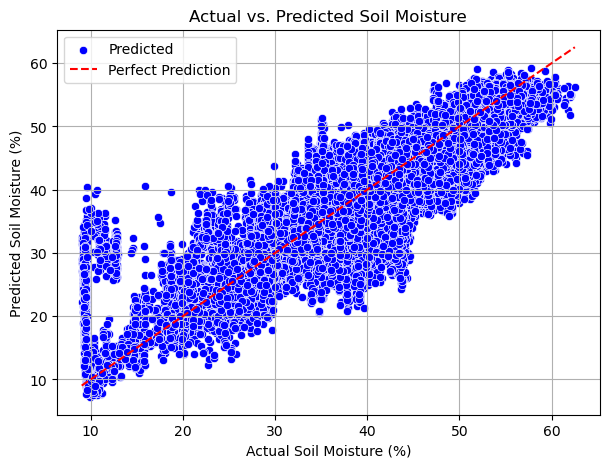

In [18]:
y_test_df = pd.DataFrame(y_test_flat, columns=['Actual Soil Moisture'])
predictions_df = pd.DataFrame(lstm_predictions_flat, columns=['Predicted Soil Moisture'])

# Combine actual and predicted values into one DataFrame
results_df = pd.concat([y_test_df, predictions_df], axis=1)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(7, 5))
sns.scatterplot(x=results_df['Actual Soil Moisture'], y=results_df['Predicted Soil Moisture'], color='blue', label='Predicted')
plt.plot(
    [results_df['Actual Soil Moisture'].min(), results_df['Actual Soil Moisture'].max()],
    [results_df['Actual Soil Moisture'].min(), results_df['Actual Soil Moisture'].max()],
    color='red', linestyle='--', label='Perfect Prediction'
)
plt.title('Actual vs. Predicted Soil Moisture')
plt.xlabel('Actual Soil Moisture (%)')
plt.ylabel('Predicted Soil Moisture (%)')
plt.legend()
plt.grid()
plt.show()

In [19]:
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': lstm_predictions}, index=X_test.index)

# Resample data to a weekly frequency
result_df_weekly = result_df.resample('W').mean()

# Plotting actual vs. predicted values using subplots
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(result_df_weekly.index, result_df_weekly['Actual'], label='Actual', marker='.')
ax.plot(result_df_weekly.index, result_df_weekly['Predicted'], label='Predicted', marker='.')

ax.set_title('Actual vs. Predicted Soil Moisture')
ax.set_xlabel('Date')
ax.set_ylabel(' Soil Moisture')
ax.legend()
plt.savefig('rf_long_predict', dpi=300)

plt.show()

ValueError: Data must be 1-dimensional, got ndarray of shape (15476, 7) instead

In [ ]:
soil_df = pd.DataFrame({
    'SoilOrder': ['Brown', 'Ultic', 'Allophanic', 'Ultic', 'Granular', 'Allophanic'],
    'LandUse': ['Drystock', 'Lifestyle block', 'Dairy'],
    'EcologicalDistrict': ['Kaipara', 'Rodney','Waitakere' , 'Tamaki', 'Awhitu', 'Manukau'],
})

# Perform one-hot encoding
soil_df_encoded = pd.get_dummies(soil_df, drop_first=True)  # drop_first to avoid multicollinearity
print(soil_df_encoded)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
soil_df['SoilOrder_encoded'] = label_encoder.fit_transform(soil_df['SoilOrder'])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
soil_df[['MeanAnnualRainfall', 'SoilMoisture', 'SoilTemp']] = scaler.fit_transform(soil_df[['MeanAnnualRainfall', 'SoilMoisture', 'SoilTemp']])

In [ ]:
combined_df = pd.merge(weather_df, soil_df_encoded, how='left', on=['Location', 'Date'])
